In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('goog.csv')
df

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


In [3]:
df.shape

(61, 6)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


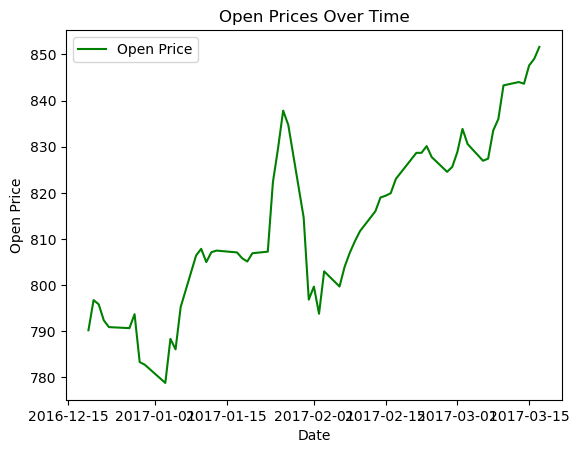

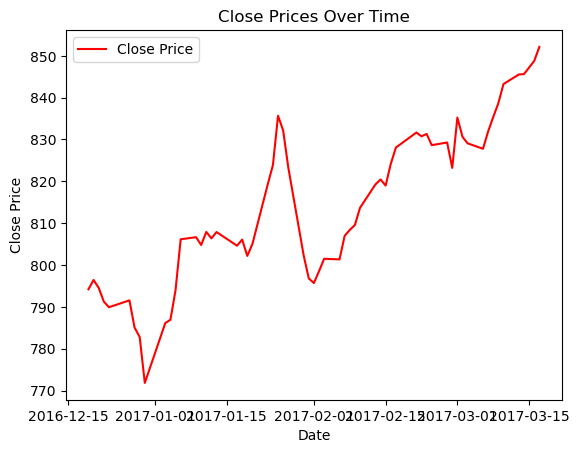

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], df['Open'], color='green', label='Open Price')
plt.xlabel('Date',size=10)
plt.ylabel('Open Price',size=10)
plt.title('Open Prices Over Time')
plt.legend()
plt.show()

plt.plot(df['Date'], df['Close'], color='red', label='Close Price')
plt.xlabel('Date',size=10)
plt.ylabel('Close Price',size=10)
plt.title('Close Prices Over Time')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [9]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
training_size = round(len(df) * 0.80)
train_data = df[:training_size]
test_data  = df[training_size:]

In [15]:
def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0

    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1

    return (np.array(sequences), np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)


In [31]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1212
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0907
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0622
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0378 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0324
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0438
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0421
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0315
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0325
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0412 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0394
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0368
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0311
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0331
Epoch 16/100
2/2 

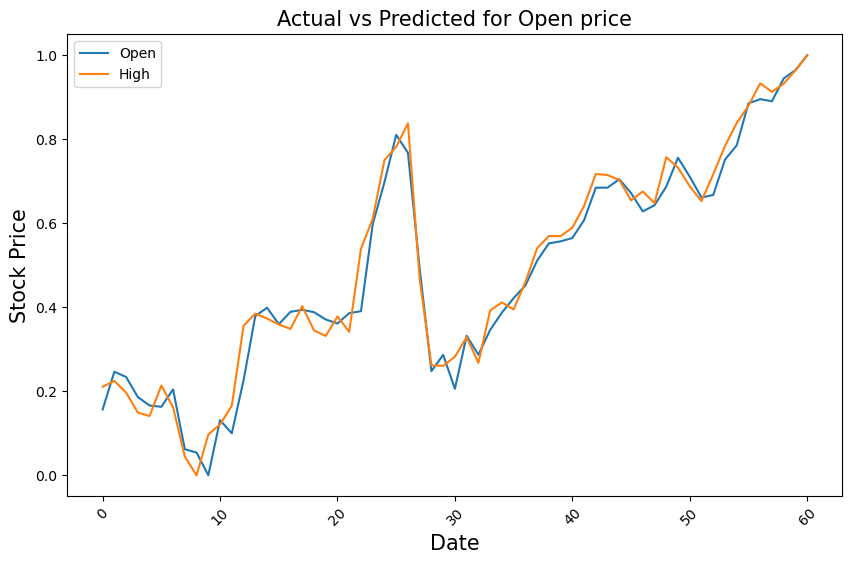

In [35]:
import matplotlib.pyplot as plt
df[['Open', 'High']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Open price', size=15)
plt.show()
